#### Data Fetch

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#extracting lines for simplied verion
open('2-fft-malicious-n-0-3-m-13.txt','w').writelines([ line for line in open("2-fft-malicious-n-0-3-m-13.log") if "Enqueue" in line])
print ("done")

done


In [3]:
#extracting content from lines
csv_out = open('2-fft-malicious-n-0-3-m-13-csv.txt','w')
with open ('2-fft-malicious-n-0-3-m-13.txt', 'rt') as fft:
    csv_out.write("time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time\n")
    for line in fft:
        line_split = line.split()
        time = line_split[line_split.index("time:") + 1]
        router = line_split[line_split.index("SwitchAllocator") + 3]
        outport = line_split[line_split.index("outport") + 1]
        inport = line_split[line_split.index("inport") + 1]
        packet_address = line_split[line_split.index("addr") + 2][1:-1]
        packet_type = line_split[line_split.index("addr") + 7]
        flit_id = line_split[line_split.index("[flit::") + 1][3:]
        flit_type = line_split[line_split.index("Id="+str(flit_id)) + 1][5:]
        vnet = line_split[line_split.index("Type="+str(flit_type)) + 1][5:]
        vc = line_split[line_split.index("Vnet="+str(vnet)) + 1][3:]
        src_ni = line_split[line_split.index("VC="+str(vc)) + 2][3:]
        src_router = line_split[line_split.index("NI="+str(src_ni)) + 2][7:]
        dst_ni = line_split[line_split.index("Router="+str(src_router)) + 2][3:]
        dst_router = line_split[line_split.index("NI="+str(dst_ni)) + 2][7:]
        enq_time = str(line_split[line_split.index("Enqueue") + 1][5:])
        line_csv = time+","+router+","+outport+","+inport+","+packet_address+","+packet_type+","+flit_id+","+flit_type+","+vnet+","+vc+","+src_ni+","+src_router+","+dst_ni+","+dst_router+","+enq_time+"\n"
        csv_out.write(line_csv)
print ("done")

done


In [4]:
#convert txt to csv

df = pd.read_csv("2-fft-malicious-n-0-3-m-13-csv.txt",delimiter=',')
df.to_csv('2-fft-malicious-n-0-3-m-13.csv',index=False)

In [5]:
#dataset
df = pd.read_csv('2-fft-malicious-n-0-3-m-13.csv')

In [6]:
df.shape

(1047850, 15)

In [7]:
df.describe()

,time,router,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
count,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06
mean,1.780978e+06,6.529522e+00,1.595540e+00,1.404442e+00,2.602338e+00,1.091483e+01,1.719416e+01,6.506250e+00,1.691440e+01,6.610910e+00,1.780956e+06
std,1.083562e+06,4.446046e+00,1.496950e+00,9.820546e-01,9.175325e-01,3.695464e+00,9.576946e+00,4.566593e+00,9.766753e+00,4.730237e+00,1.083562e+06
min,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.528330e+05,3.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00,1.300000e+01,3.000000e+00,1.300000e+01,3.000000e+00,7.528120e+05
50%,1.852138e+06,6.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00,2.000000e+01,7.000000e+00,2.000000e+01,6.000000e+00,1.852124e+06
75%,2.711184e+06,1.000000e+01,3.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01,2.400000e+01,1.100000e+01,2.400000e+01,1.100000e+01,2.711167e+06
max,3.270875e+06,1.500000e+01,4.000000e+00,3.000000e+00,4.000000e+00,1.900000e+01,3.100000e+01,1.500000e+01,3.100000e+01,1.500000e+01,3.270842e+06


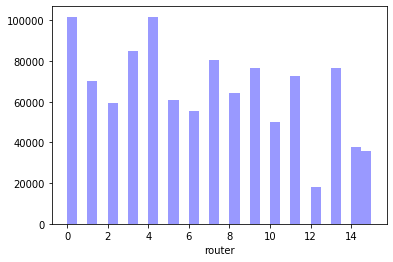

In [8]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

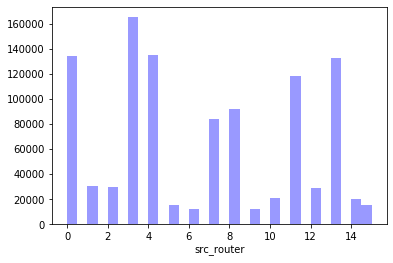

In [9]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

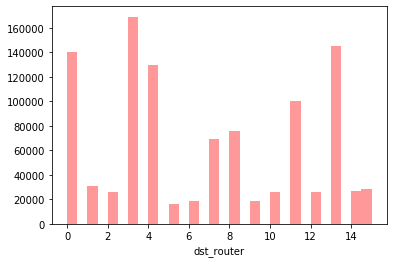

In [10]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

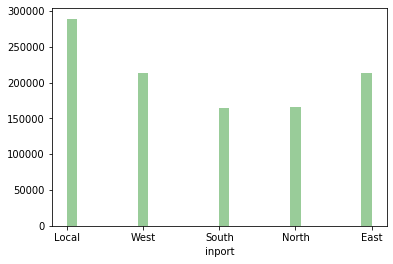

In [11]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

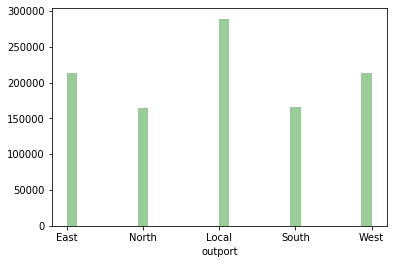

In [12]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

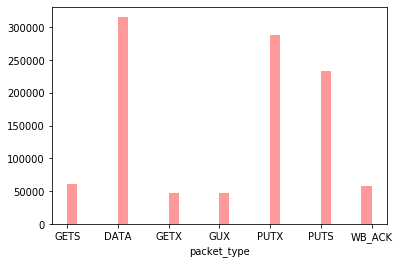

In [13]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')

In [14]:
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}
df = df.replace({'inport': direction, 'outport': direction})

In [15]:
data = {'GETS': 1,'GETX': 2,'GUX': 3,'DATA': 4, 'PUTX': 5,'PUTS': 6,'WB_ACK':7}
df = df.replace({'packet_type': data})

In [16]:
df['flit_id'] = df['flit_id']+1
df['flit_type'] = df['flit_type']+1
df['vnet'] = df['vnet']+1
df['vc'] = df['vc']+1

In [17]:
hoparr = {"0to0":0,"0to1":1,"0to2":2,"0to3":3,"0to4":1,"0to5":2,"0to6":3,"0to7":4,"0to8":2,"0to9":3,"0to10":4,"0to11":5,"0to12":3,"0to13":4,"0to14":5,"0to15":6,
         "1to1":0,"1to2":1,"1to3":2,"1to4":2,"1to5":1,"1to6":2,"1to7":3,"1to8":3,"1to9":2,"1to10":3,"1to11":4,"1to12":5,"1to13":3,"1to14":4,"1to15":5,
         "2to2":0,"2to3":1,"2to4":3,"2to5":2,"2to6":1,"2to7":2,"2to8":4,"2to9":3,"2to10":2,"2to11":3,"2to12":5,"2to13":4,"2to14":3,"2to15":4,
         "3to3":0,"3to4":4,"3to5":3,"3to6":2,"3to7":1,"3to8":5,"3to9":4,"3to10":3,"3to11":2,"3to12":6,"3to13":5,"3to14":4,"3to15":3,
         "4to4":0,"4to5":1,"4to6":2,"4to7":3,"4to8":1,"4to9":2,"4to10":3,"4to11":4,"4to12":2,"4to13":3,"4to14":4,"4to15":5,
         "5to5":0,"5to6":1,"5to7":2,"5to8":2,"5to9":1,"5to10":2,"5to11":3,"5to12":3,"5to13":2,"5to14":3,"5to15":4,
         "6to6":0,"6to7":1,"6to8":3,"6to9":2,"6to10":1,"6to11":2,"6to12":4,"6to13":3,"6to14":2,"6to15":3,
         "7to7":0,"7to8":4,"7to9":3,"7to10":2,"7to11":1,"7to12":5,"7to13":4,"7to14":3,"7to15":2,
         "8to8":0,"8to9":1,"8to10":2,"8to11":3,"8to12":1,"8to13":2,"8to14":3,"8to15":4,
         "9to9":0,"9to10":1,"9to11":2,"9to12":2,"9to13":1,"9to14":2,"9to15":4,
         "10to10":0,"10to11":1,"10to12":3,"10to13":2,"10to14":1,"10to15":2,
         "11to11":0,"11to12":4,"11to13":3,"11to14":2,"11to15":1,
         "12to12":0,"12to13":1,"12to14":2,"12to15":3,
         "13to13":0,"13to14":1,"13to15":2,
         "14to14":0,"14to15":1,
         "15to15":0}

In [18]:
packarr = {}
packtime = {}
packchunk = []
hopcurrentarr = []
hoptotarr = []
hoppercentarr =[]
waitingarr = []
interval = 500
count = 0
for index, row in df.iterrows():
    current_time = row["time"]
    enqueue_time = row["enq_time"]
    waiting_time = current_time - enqueue_time
    waitingarr.append(waiting_time)
    current_router = row["router"]
    src_router = row["src_router"]
    dst_router = row["dst_router"]
    src_router_temp = src_router
    if src_router_temp>dst_router:
        temph = src_router_temp
        src_router_temp = dst_router
        dst_router = temph
    hop_count_string = str(src_router_temp)+"to"+str(dst_router)
    src_router_temp = src_router
    hop_count = hoparr.get(hop_count_string)
    if src_router_temp>current_router:
        tempc = src_router_temp
        src_router_temp = current_router
        current_router = tempc
    current_hop_string = str(src_router_temp)+"to"+str(current_router)
    current_hop = hoparr.get(current_hop_string)
    if(current_hop == 0 and hop_count ==0):
        hop_percent = 0
    else:
        hop_percent = current_hop/hop_count
    hoptotarr.append(hop_count)
    hopcurrentarr.append(current_hop)
    hoppercentarr.append(hop_percent)
    if row["packet_address"] not in packarr:
        packarr[row["packet_address"]] = count
        packtime[row["packet_address"]] = row["time"]
        packchunk.append(packarr.get(row["packet_address"]))
        count+=1
    else:
        current_time = row["time"]
        position = packarr.get(row["packet_address"])
        pkt_time = packtime.get(row["packet_address"])
        current_max = max(packarr.values())
        if (current_time-pkt_time)<interval:
            packchunk.append(packarr.get(row["packet_address"]))
        else:
            del packarr[row["packet_address"]]
            del packtime[row["packet_address"]]
            packarr[row["packet_address"]] = current_max+1
            packtime[row["packet_address"]] = row["time"]
            packchunk.append(packarr.get(row["packet_address"]))
            if (current_max)==count:
                count+=2
            elif (current_max+1)==count:
                count+=1

In [19]:
df['packet_address'].nunique()

5740

In [20]:
print(len(packarr))

5740


In [21]:
print(len(packchunk))

1047850


In [22]:
df = df.assign(traversal_id=packchunk)
df = df.assign(hop_count=hoptotarr)
df = df.assign(current_hop=hopcurrentarr)
df = df.assign(hop_percentage=hoppercentarr)
df = df.assign(enqueue_time=waitingarr)

In [23]:
df.rename(columns={'packet_type': 'cache_coherence_type', 'time': 'timestamp'}, inplace=True)

In [24]:
df = df.drop(columns=['packet_address','enq_time'])

In [25]:
df.isnull().sum()

timestamp               0
router                  0
outport                 0
inport                  0
cache_coherence_type    0
flit_id                 0
flit_type               0
vnet                    0
vc                      0
src_ni                  0
src_router              0
dst_ni                  0
dst_router              0
traversal_id            0
hop_count               0
current_hop             0
hop_percentage          0
enqueue_time            0
dtype: int64

In [26]:
df.dtypes

timestamp                 int64
router                    int64
outport                   int64
inport                    int64
cache_coherence_type      int64
flit_id                   int64
flit_type                 int64
vnet                      int64
vc                        int64
src_ni                    int64
src_router                int64
dst_ni                    int64
dst_router                int64
traversal_id              int64
hop_count                 int64
current_hop               int64
hop_percentage          float64
enqueue_time              int64
dtype: object

In [27]:
df.to_csv('2-fft-malicious-n-0-3-m-13.csv',index=False)

#### Router Fetch

In [28]:
df = pd.read_csv('2-fft-malicious-n-0-3-m-13.csv')
df.shape

(1047850, 18)

In [29]:
df = df.loc[df['router'] == 1]
df = df.drop(columns=['router'])
df.to_csv('2-fft-malicious-n-0-3-m-13-r1.csv',index=False)

In [2]:
df = pd.read_csv('2-fft-malicious-n-0-3-m-13-r1.csv')

In [3]:
def timecount(df):
    timearr = []
    interval = 99
    count = 0
    for index, row in df.iterrows():
        if row["timestamp"]<=interval:
            count+=1
        else:
            timearr.append([interval+1,count])
            count=1
            interval+=100
    timearr.append([interval+1,count])
    return timearr

In [4]:
def maxcount(timearr,df):
    countarr = []
    increarr = []
    maxarr = []
    for i in range(len(timearr)):
        for cnt in range(timearr[i][1],0,-1):
            countarr.append(cnt)
            maxarr.append(timearr[i][1])
            increment = timearr[i][1] - cnt + 1
            increarr.append(increment)
    df = df.assign(packet_count_decr=countarr)
    df = df.assign(packet_count_incr=increarr)
    df = df.assign(max_packet_count=maxarr)
    return df

In [5]:
df = maxcount(timecount(df),df)

In [6]:
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count
0,11,2,4,1,1,4,3,9,0,0,23,7,0,4,1,0.250000,8,2,1,2
1,84,4,2,1,1,4,3,9,3,3,24,8,3,5,2,0.400000,12,1,2,2
2,238,2,4,1,1,4,3,9,0,0,22,6,8,3,1,0.333333,8,1,1,1
3,365,2,4,1,1,4,3,9,0,0,23,7,11,4,1,0.250000,8,1,1,1
4,386,1,2,1,1,4,3,9,3,3,21,5,12,3,2,0.666667,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70282,3270654,2,4,1,1,4,3,10,0,0,22,6,30074,3,1,0.333333,36,1,6,6
70283,3270850,2,4,5,1,1,3,9,0,0,27,11,30075,5,1,0.200000,8,1,1,1
70284,3270857,2,4,5,2,2,3,9,0,0,27,11,30075,5,1,0.200000,15,3,1,3
70285,3270864,2,4,5,3,2,3,9,0,0,27,11,30075,5,1,0.200000,22,2,2,3


In [7]:
def rename(df):
    df['traversal_id'] = df['traversal_id']+1
    df["packet_count_index"] = df["packet_count_decr"]*df["packet_count_incr"]
    df["packet_max_index"] = df["packet_count_index"]*df["max_packet_count"]
    df["port_index"] = df["outport"]*df["inport"]
    df["cache_coherence_flit_index"] = df["cache_coherence_type"]*df["flit_id"]
    df["flit_index"] = df["cache_coherence_flit_index"]*df["flit_type"]
    df["traversal_index"] = df["flit_index"]*df["traversal_id"]
    df["cache_coherence_vnet_index"] = df["cache_coherence_type"]*df["vnet"]
    df["vnet_vc_index"] = df["vnet"]*df["vc"]
    df["vnet_vc_cc_index"] = df["vnet"]*df["cache_coherence_vnet_index"]
    df.head(50)

In [8]:
rename(df)

In [9]:
df['target'] = 0

In [10]:
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,...,2,4,8,1,4,4,3,27,9,0
1,84,4,2,1,1,4,3,9,3,3,...,2,4,8,1,4,16,3,27,9,0
2,238,2,4,1,1,4,3,9,0,0,...,1,1,8,1,4,36,3,27,9,0
3,365,2,4,1,1,4,3,9,0,0,...,1,1,8,1,4,48,3,27,9,0
4,386,1,2,1,1,4,3,9,3,3,...,1,1,2,1,4,52,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70282,3270654,2,4,1,1,4,3,10,0,0,...,6,36,8,1,4,120300,3,30,9,0
70283,3270850,2,4,5,1,1,3,9,0,0,...,1,1,8,5,5,150380,15,27,45,0
70284,3270857,2,4,5,2,2,3,9,0,0,...,3,9,8,10,20,601520,15,27,45,0
70285,3270864,2,4,5,3,2,3,9,0,0,...,4,12,8,15,30,902280,15,27,45,0


In [11]:
df.dtypes

timestamp                       int64
outport                         int64
inport                          int64
cache_coherence_type            int64
flit_id                         int64
flit_type                       int64
vnet                            int64
vc                              int64
src_ni                          int64
src_router                      int64
dst_ni                          int64
dst_router                      int64
traversal_id                    int64
hop_count                       int64
current_hop                     int64
hop_percentage                float64
enqueue_time                    int64
packet_count_decr               int64
packet_count_incr               int64
max_packet_count                int64
packet_count_index              int64
packet_max_index                int64
port_index                      int64
cache_coherence_flit_index      int64
flit_index                      int64
traversal_index                 int64
cache_cohere

In [12]:
df.to_csv('2-fft-malicious-n-0-3-m-13-r1.csv',index=False)